In [11]:
from keras.layers import Concatenate
import os

from google.colab import drive
drive.mount('/content/drive/')

import sys

from keras.layers import Concatenate
import os


import scipy.io as sio
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.utils import to_categorical

from keras.preprocessing import sequence

from keras.models import Sequential
from keras.models import Model

from keras.layers import Input
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Bidirectional
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import UpSampling1D


from tensorflow.keras.optimizers import Adam

from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint



activities = list(range(1,28))


def select_subject(d_path, subject):
    select_statement = '_s{}_'.format(subject)
    subjects = []
    for i in d_path:
        if select_statement in i:
            subjects.append(i)
    return subjects


# def get_action_number(single_path):
#     return int(single_path.split('_')[0][1:])
# def get_subject_number(single_path):
#     return int(single_path.split('_')[1][1:])
# def get_trial_number(single_path):
#     return int(single_path.split('_')[2][1:])

def get_action_number(single_path):
    return int(single_path.split('/')[-1].split('_')[0][1:])
def get_subject_number(single_path):
    return int(single_path.split('/')[-1].split('_')[1][1:])
def get_trial_number(single_path):
    return int(single_path.split('/')[-1].split('_')[2][1:])


def get_dataset():
  skel_directory='/content/drive/MyDrive/dataOriginal/Skeleton'
  iner_directory='/content/drive/MyDrive/dataOriginal/Inertial'
  skeleton_path=[]
  iner_path=[]
  for filename in os.listdir(skel_directory):
    skeleton_path.append(skel_directory+'/'+filename)

  for filename in os.listdir(iner_directory):
    iner_path.append(iner_directory+'/'+filename)

  return skeleton_path,iner_path


skeleton_path, inertial_path = get_dataset()










# Inertial

# train on trial 1,2,3
# test on trial 4
X_train_iner = []
Y_train_iner = []
X_test_iner = []
Y_test_iner = []

resample_len = 180

for path in inertial_path:
    if get_trial_number(path) in [1,2,3]:
        X_train_iner.append(path)
        Y_train_iner.append(get_action_number(path))
    else:
        X_test_iner.append(path)
        Y_test_iner.append(get_action_number(path))




# X_train_iner = [pad_len_inertial(sio.loadmat(x)['d_iner']) for x in X_train_iner]
# X_test_iner = [pad_len_inertial(sio.loadmat(x)['d_iner']) for x in X_test_iner]

X_train_iner = [resample(sio.loadmat(x)['d_iner'], resample_len) for x in X_train_iner]
X_test_iner = [resample(sio.loadmat(x)['d_iner'], resample_len) for x in X_test_iner]


X_train_iner = np.array(X_train_iner)
X_test_iner = np.array(X_test_iner)

Y_train_iner = to_categorical(np.array(Y_train_iner) - 1)
Y_test_iner = to_categorical(np.array(Y_test_iner) - 1)





X_train_iner.shape, Y_train_iner.shape, X_test_iner.shape, Y_test_iner.shape

print('X_train_iner.shape',X_train_iner.shape)
print('Y_train_iner.shape',Y_train_iner.shape)
print('X_test_iner.shape',X_test_iner.shape)
print('Y_test_iner.shape',Y_test_iner.shape)


# Skel
# train on trial 1,2,3
# test on trial 4
X_train_skel = []
Y_train_skel = []
X_test_skel = []
Y_test_skel = []

resample_len = 180

for path in skeleton_path:
    if get_trial_number(path) in [1,2,3]:
        X_train_skel.append(path)
        Y_train_skel.append(get_action_number(path))
    else:
        X_test_skel.append(path)
        Y_test_skel.append(get_action_number(path))

# X_train_skel = [pad_len_inertial(sio.loadmat(x)['d_iner']) for x in X_train_skel]
# X_test_skel = [pad_len_inertial(sio.loadmat(x)['d_iner']) for x in X_test_skel]

X_train_skel = [np.reshape(resample(sio.loadmat(x)['d_skel'], resample_len, axis = -1), (60,180)) for x in X_train_skel]
X_test_skel = [np.reshape(resample(sio.loadmat(x)['d_skel'], resample_len, axis = -1), (60,180)) for x in X_test_skel]


X_train_skel = np.array(X_train_skel)
X_test_skel = np.array(X_test_skel)

X_train_skel = np.swapaxes(X_train_skel, 1,2)
X_test_skel = np.swapaxes(X_test_skel, 1,2)

Y_train_skel = to_categorical(np.array(Y_train_skel) - 1)
Y_test_skel = to_categorical(np.array(Y_test_skel) - 1)



Y_train = Y_train_iner
Y_test = Y_test_iner

X_train_skel.shape, Y_train_skel.shape, X_test_skel.shape, Y_test_skel.shape
print('---------------------------------------------------')
print('X_train_skel.shape',X_train_skel.shape)
print('Y_train_skel.shape',Y_train_skel.shape)
print('X_test_skel.shape',X_test_skel.shape)
print('Y_test_skel.shape',Y_test_skel.shape)





Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
X_train_iner.shape (648, 180, 6)
Y_train_iner.shape (648, 27)
X_test_iner.shape (213, 180, 6)
Y_test_iner.shape (213, 27)
---------------------------------------------------
X_train_skel.shape (648, 180, 60)
Y_train_skel.shape (648, 27)
X_test_skel.shape (213, 180, 60)
Y_test_skel.shape (213, 27)


In [62]:

from keras.layers import LayerNormalization,MultiHeadAttention
def CA(s1, s2, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    scr1 = LayerNormalization(epsilon=1e-6)(s1)
    scr2 = LayerNormalization(epsilon=1e-6)(s2)


    src1_cross = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(scr1, scr2, scr2)
    scr1 = s1 + Dropout(dropout)(src1_cross)


    # Normalization and Attention
    src2_cross = MultiHeadAttention(num_heads=num_heads, key_dim=head_size, dropout=dropout)(scr2, scr1, scr1)
    scr2 = s2 + Dropout(dropout)(src2_cross)



    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(scr1)
    x = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(x)
    x = Dropout(dropout)(x)
    x = Conv1D(filters=scr1.shape[-1], kernel_size=1)(x)
    x = x + scr1

    # Feed Forward Part
    y = LayerNormalization(epsilon=1e-6)(scr2)
    y = Conv1D(filters=ff_dim, kernel_size=1, activation='relu')(y)
    y = Dropout(dropout)(y)
    y = Conv1D(filters=scr2.shape[-1], kernel_size=1)(y)
    y = y + scr2

    return Concatenate()([x,y])
    #return  x+y


from keras.models import model_from_json


# load json and create model
json_file = open('/content/drive/MyDrive/dataOriginal/ae_skel_19_9_23.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
model_AE = Model(inputs=loaded_model.inputs, outputs=loaded_model.layers[1].output)




def conv_LSTM2():
    # Create the model
    np.random.seed(7)
    optimizer = Adam(lr=1e-4)


    model = Sequential(name = 'conv_LSTM1')
    model.add(Conv1D(16, 3,padding='same',activation='relu', strides=1,kernel_initializer = 'glorot_uniform',input_shape=(180, 60)))
    model.add(Conv1D(32,3,padding='same',activation='relu',strides=1,kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(64,3,padding='same',activation='relu',strides=1,kernel_initializer = 'glorot_uniform'))
    model.add(Conv1D(128,3,padding='same',activation='relu',strides=1,kernel_initializer = 'glorot_uniform'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add(LSTM(512, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    #model.add(LayerNormalization())


    model2 = Sequential(name='conv_LSTM2')
    model2.add(Conv1D(16, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform',
                      input_shape=(180, 6)))
    model2.add(Conv1D(32, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model2.add(MaxPooling1D(pool_size=2))
    model2.add(Conv1D(64, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model2.add(Conv1D(128, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model2.add(MaxPooling1D(pool_size=2))
    model2.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model2.add(LSTM(512, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    #model2.add(LayerNormalization())


    model3 = Sequential(name='conv_LSTM3')
    model3.add(Conv1D(16, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform',
                      input_shape=(180, 6)))
    model3.add(Conv1D(32, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model3.add(MaxPooling1D(pool_size=2))
    model3.add(Conv1D(64, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model3.add(Conv1D(128, 3, padding='same', activation='relu', strides=1, kernel_initializer='glorot_uniform'))
    model3.add(MaxPooling1D(pool_size=2))
    model3.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model3.add(LSTM(512, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    #model3.add(LayerNormalization())


    #======Manner_1=========
    #x = CA(model3.output, model2.output, 128, 4,  16, 0.25)


    #merged_output =Concatenate()([model.output, model2.output, model3.output])

    #x =Concatenate()([model.output, model3.output ])
    merged_output = CA(model3.output, model2.output, 128, 4,  16, 0.25)
    #merged_output =Concatenate()([model.output, x ])


    #merged_output=LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)(merged_output)
    #merged_output=LSTM(512, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)(merged_output)
    #merged_output=LayerNormalization()(merged_output)

    mer = Flatten()(merged_output)
    fully_connected = Dense(27, activation='softmax')(mer)
    combined_model = Model([model.input, model2.input, model3.input], fully_connected)


    # model.add(LSTM(256, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    # model.add(LSTM(512, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    # model.add(Flatten())
    # model.add(Dropout(0.5))
    # model.add(Dense(len(activities), activation='softmax'))
    combined_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    #combined_model.summary()
    return combined_model




model = conv_LSTM2()
#model = UNet_LSTM()

In [63]:
LOG_DIR = os.path.join(os.getcwd(), 'logs')
tb = TensorBoard(LOG_DIR)

weights_dir = 'weights/conv_LSTM2-{epoch:02d}-{loss:.2f}.hdf5'
chkpt = ModelCheckpoint(filepath=weights_dir, monitor='val_acc', save_best_only=True, save_weights_only=True, mode='auto', period=1)

#early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10)

history = model.fit([X_train_skel, X_train_iner,model_AE.predict( X_train_skel)], Y_train, epochs=50, batch_size=185, validation_data = ([X_test_skel,X_test_iner,model_AE.predict(X_test_skel)], Y_test), callbacks=[tb])

7/7 [==============================] - 0s 46ms/step
Epoch 1/50
4/4 [==============================] - 32s 2s/step - loss: 4.8449 - accuracy: 0.0648 - val_loss: 10.8182 - val_accuracy: 0.0516
Epoch 2/50
4/4 [==============================] - 5s 947ms/step - loss: 13.2467 - accuracy: 0.0617 - val_loss: 14.3137 - val_accuracy: 0.0376
Epoch 3/50
4/4 [==============================] - 3s 853ms/step - loss: 10.7246 - accuracy: 0.0648 - val_loss: 7.2242 - val_accuracy: 0.1502
Epoch 4/50
4/4 [==============================] - 3s 849ms/step - loss: 4.8258 - accuracy: 0.1991 - val_loss: 3.4748 - val_accuracy: 0.2817
Epoch 5/50
4/4 [==============================] - 4s 1s/step - loss: 3.3098 - accuracy: 0.2469 - val_loss: 2.6501 - val_accuracy: 0.4366
Epoch 6/50
4/4 [==============================] - 4s 834ms/step - loss: 2.4040 - accuracy: 0.4012 - val_loss: 1.6601 - val_accuracy: 0.4930
Epoch 7/50
4/4 [==============================] - 3s 808ms/step - loss: 1.8257 - accuracy: 0.4660 - val_loss:

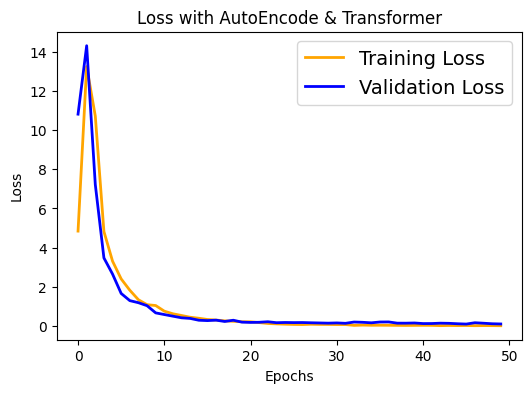

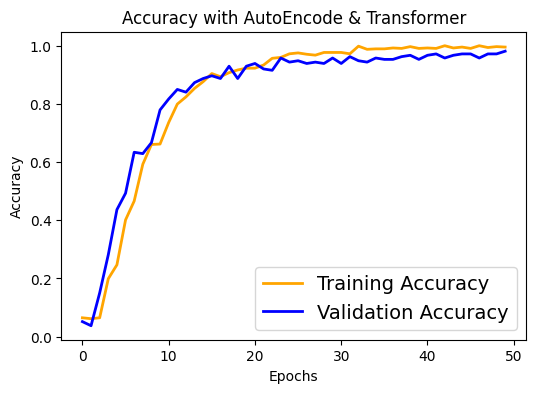

In [66]:
import matplotlib.pyplot as plt

# Plotting the loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'orange', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss with AutoEncode & Transformer', fontsize=12)

# Plotting the accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'orange', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy with AutoEncode & Transformer', fontsize=12)

plt.show()